<a href="https://colab.research.google.com/github/CJSackey/100-days-of-code/blob/master/Data_Cleaning_Regression_project_California_House_Prices_(1990).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being too toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

### Obective
Determine the Median house prices for California districts derived from the 1990 census.

###Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.The columns are as follows:

- longitude: measuring how far west a house is; a higher value is farther west

- latitude: measuring how far north a house is; a higher value is farther north

- housingmedianage; Median ager of a house within a block; a lower number is a newer building

- total_rooms: sum of rooms within a block

- total_bedrooms: sum of bedrooms within a block

- population: total number of residents in within a block

- households: sum of households; a group of people residing within a home unit, for a block

- median_income: median inccome for households withina block of houses (measured in tens of thousands of USD).

- medianhousevalue: median house value for households (measured in tens of thousands of USD)

- ocean_proximity: location of the house within reasonable distance to ocean/sea

Downloading all `modules` and `libraries` required, and our file:

In [3]:
# Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# Import our file:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- the count for each value in `ocean_proximity` column

In [7]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


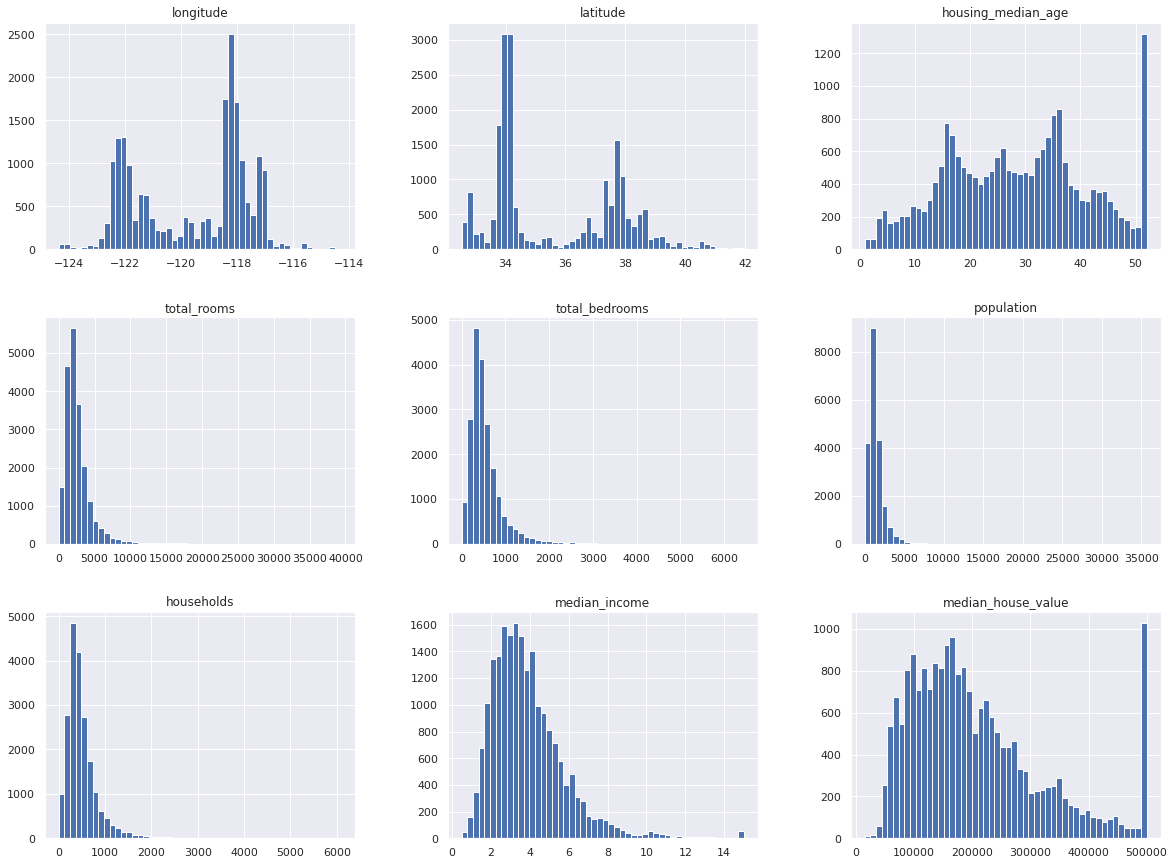

In [17]:
# We use the bins parameter to custom the number of bins shown on the plots:

df.hist(bins=50, figsize=(20,15))
plt.show()

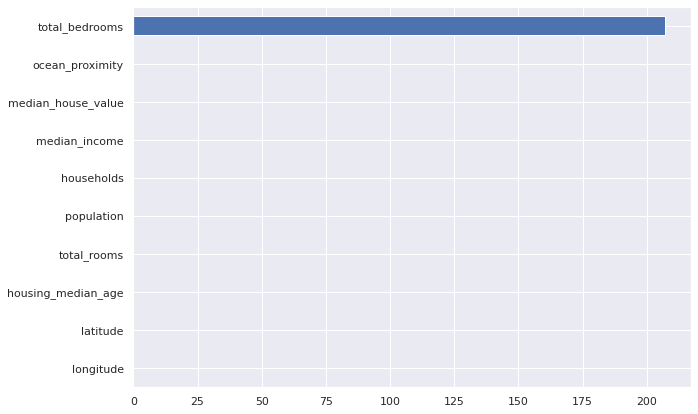

In [16]:
# We're having a quick glance to ascertain if there are any missing data in our files:

sns.set()
df.isna().sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,7))

We can see that there is missing data in the `total_bedrooms` column. We will have to clean the data accordingly. But before that, let's get some additional information about our data, below:

### Exploratory Data Analysis (EDA)

In order to further understand our data, it's good practice to carry out an EDA - analysing our data sets to summarise their main characteristics, often with visual methods.

Creating a copy of our data file is good practice, so that we can work one a copy for the training data.



In [18]:
# Create a copy of the data - `df2`
df2 = df.copy()

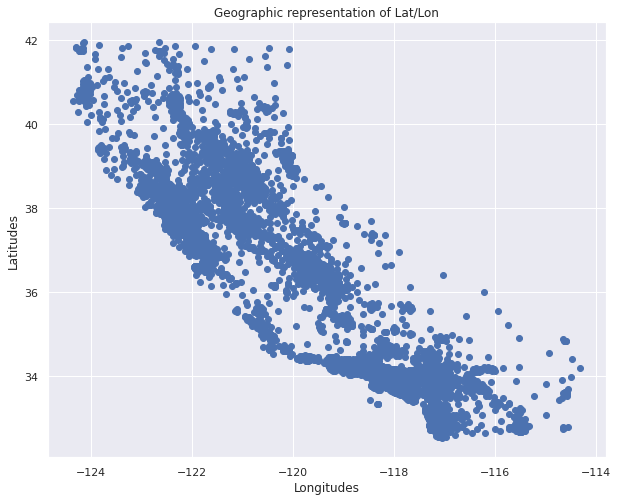

In [20]:
# As we have geographic information in our data (longitude and latitude), we can create a scatterplot

sns.set()
plt.figure(figsize=(10,8))
plt.scatter('longitude', 'latitude', data=df2)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographic representation of Lat/Lon')
plt.show()

The above `scatter plot` appears to mirror the shape of the map of the US State of California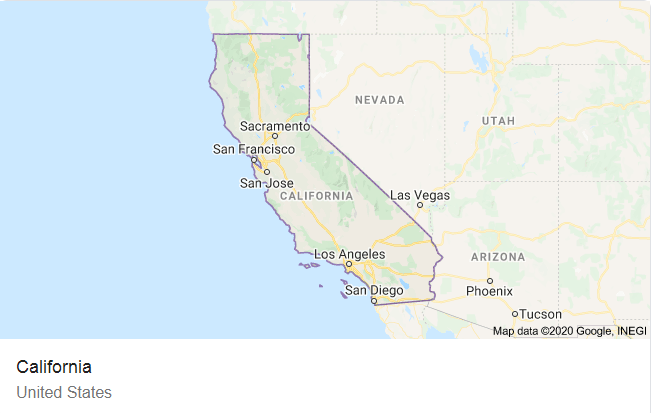

We can obtain further **informative** look by plotting to see the density for each point using a simple modification:

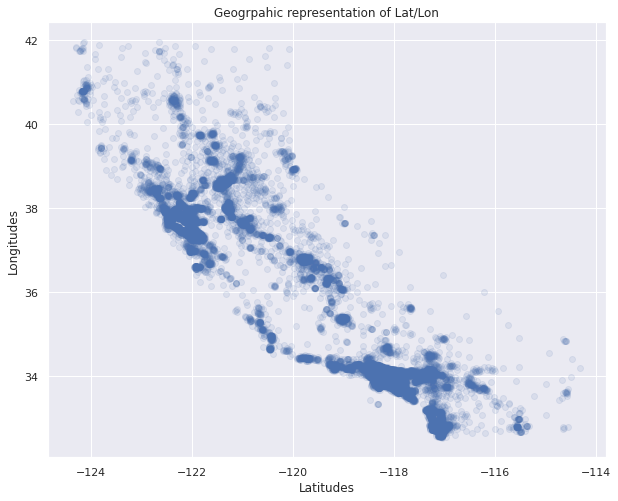

In [23]:
sns.set()
plt.figure(figsize=(10,8))
plt.scatter('longitude', 'latitude', data=df2, alpha=0.1)
plt.ylabel('Longitudes')
plt.xlabel('Latitudes')
plt.title('Geogrpahic representation of Lat/Lon')
plt.show()

With the above plot, we can visually see the densely populated area clearly, including the Bay Area all around San Diego and Los Angeles. It's always a good idea to play around with visualisations so that the patterns are clearly visible.

We can include a heatmap to indicate that house prices are relative to the location (for example close to the ocean) and to the density of the population:

<Figure size 720x504 with 0 Axes>

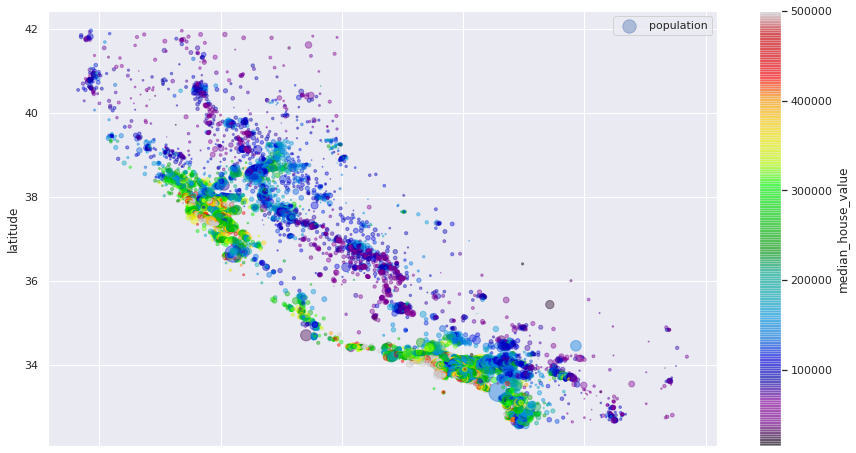

In [28]:
plt.figure(figsize=(10,7))
df2.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
         s=df2['population']/100, label='population', figsize=(15,8),
         c='median_house_value', cmap=plt.get_cmap('nipy_spectral'), colorbar=True,
         )
plt.legend()


In [29]:
# Checking the correlation between the main features with the Pandas function (Scatter_matrix) which shows linear correlations between features:

corr_matrix = df2.corr()
corr_matrix.median_house_value.sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

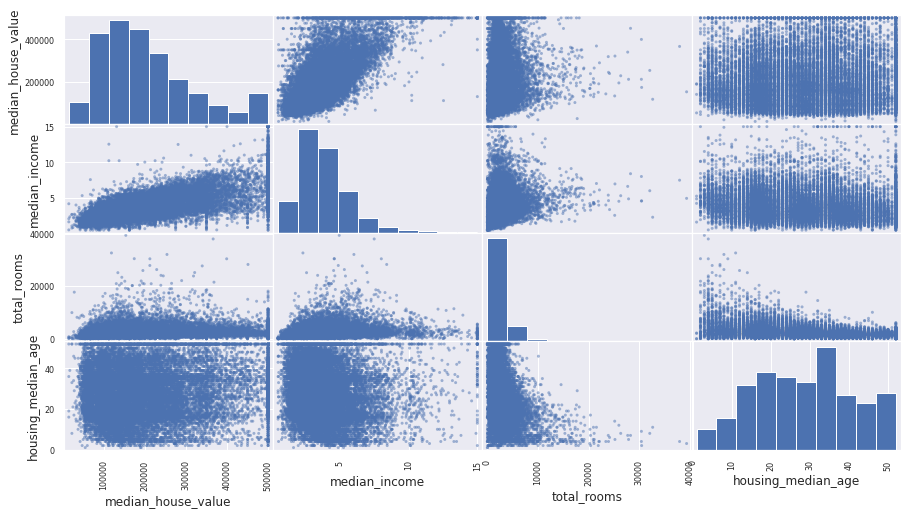

In [38]:
from pandas.plotting import scatter_matrix
sns.set()
feat = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df2[feat],figsize=(15,8))

plt.show()

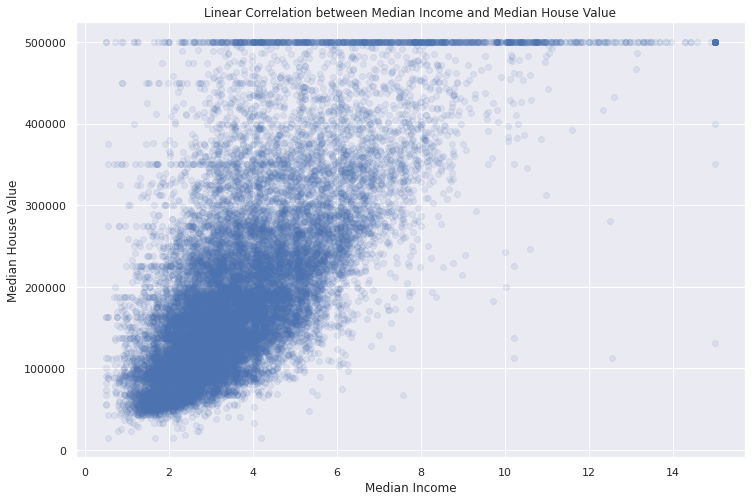

In [39]:
plt.figure(figsize=(12, 8))
plt.scatter('median_income', 'median_house_value', data=df2, alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Correlation between Median Income and Median House Value')

plt.show()

It's always a good idea to try out various attribute combinations before preparing the data for Machine Learning. For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household:

In [40]:
# Insert a new column showing the number of rooms per household

df2['rooms_per_household'] = df2.total_rooms/df2.households

In [41]:
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [45]:
corr_matrix1=df2.corr()
corr=corr_matrix1.median_house_value.sort_values(ascending=False)
d = pd.DataFrame({'Column': corr.index,
                  'Correlation with median_house_value':corr.values})
d

,Column,Correlation with median_house_value
0,median_house_value,1.000000
1,median_income,0.688075
2,rooms_per_household,0.151948
3,total_rooms,0.134153
4,housing_median_age,0.105623
5,households,0.065843
6,total_bedrooms,0.049686
7,population,-0.024650
8,longitude,-0.045967
9,latitude,-0.144160


The number of rooms per household now appear more informative than just the total number of rooms.

### Data cleaning

As most Machine Learning algorithms don't work with missing features, we can address the missing values. We can consider three options:

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.)

Since we don't have a lot of data the first option won't be the best , the second one too because we need that feature , the wisest choice could be the median , we can't affect the mean because we have some outliers this will affect our training model.


In [47]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091


In [46]:
df2.isnull().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity  rooms_per_household
False      False     False               False        False           False       False       False          False               False            False                  20433
                                                      True            False       False       False          False               False            False                    207
dtype: int64

As we can see from above, there is a `Null` data in `total_bedrooms`.
We can consider using `Scikit learn` to compute median, mean...strategies etc. to fill in the relevant index.

In [51]:
# Looking at non-standard missing values it looks like it'll be better to fill the missing values with 'median' using Scikit Learn:
 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


If we run the code ( imputer.fit(data) ) we'll have an error since the imputer doesn't work on objects, and as shown at the very beginning we have a categorical attribute which is "**Ocean_proximity**" so we need to drop that.

In [52]:
ft_data = df2.drop('ocean_proximity', axis=1)

In [54]:
imputer.fit(ft_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [55]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00])

In [56]:
ft_data.total_bedrooms.median()

435.0

In [57]:
X = imputer.transform(ft_data)

In [59]:
ft_transformed = pd.DataFrame(X, columns=ft_data.columns)
ft_transformed.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,5.254717


We can see that the missing values in `total_bedrooms` is now replaced by the median value

In [61]:
ft_transformed.isna().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  rooms_per_household
False      False     False               False        False           False       False       False          False               False                  20640
dtype: int64

We can also sort out the categorical data issue

In [62]:
obj_cols = df2.dtypes
obj_cols[obj_cols == 'object']

ocean_proximity    object
dtype: object

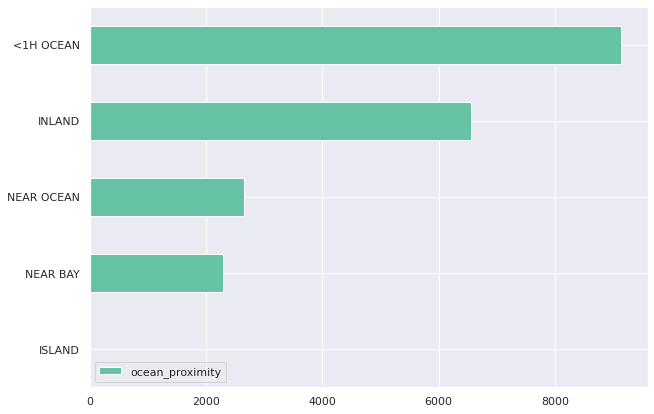

In [63]:
sns.set(palette='Set2')
df2.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,7))
plt.legend()

In [64]:
# We can hot-encode the labels - there are various encoders for categoriacal objects: label encoding, ordinal encoder etc.

from sklearn.preprocessing import OneHotEncoder
lab_encoder = OneHotEncoder()
cat_house = df2[['ocean_proximity']]
cat_enc = lab_encoder.fit_transform(cat_house)

One of the most important transformation step to apply to your data is Feature Scaling Because with some few exceptions, Machine learning algorithm won't perform well since we have different attributes scales, so what we want to do is to scale them , note that target attribute doesn't have to be scaled

We have two common ways to get all the attributes to have the same scale

1. Min-Max Scaling. Many people call it Normalization and its quite simple , values are shifted and rescaled to be in a range of 0 and 1


2. Standardization is a bit different, first it substracts the mean value so standardized values always have a zero mean, then it divides by the standard deviation so that the resulting distribution has unit variance, this is how we calculate standard deviation 

N is the number of our samples, We sum the Squared difference from mean which means (X(i) - X̅) squared then we have our standard deviation, but dont worry we have a lot of ways compute all this, but it's always good to know what your computing. To compute STD ( standard deviation ) we use numpy , exemple : to compute the STD for the median_income we only have to do this --> np.std(data['median_income'])



As we showed, we would require a lot of transformations but thanks to scikit learn that provides a Pipeline class to help with such transformations.

We are now ready to start training our model on the train set and test it's accuracy on the test set that we created with the train_test_split function.